# Imports



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.datasets import mnist
from keras import backend as K
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [2]:
np.random.seed(0)

# Prepare Data

In [3]:
def prepare_date():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()

  # Normalize & Flatten Data Points
  x_train = x_train / 255.0
  x_test = x_test / 255.0

  x_train = x_train.reshape(x_train.shape[0], -1)
  x_test = x_test.reshape(x_test.shape[0], -1)

  # Categorical Labels
  y_train = keras.utils.to_categorical(y_train, 10)
  y_test = keras.utils.to_categorical(y_test, 10)

  return x_train, y_train, x_test, y_test

In [4]:
data_points_train, labels_train, data_points_test, labels_test = prepare_date()

# Implement Model

In [5]:
def recall(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  recall = true_positives / (possible_positives + K.epsilon())
  return recall

In [6]:
def precision(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  return precision

In [37]:
def create_model(x_input=data_points_train, y_input=labels_train, batch_size=128, epochs=20, number_of_layes=2, hidden_units=256, optimizer_type='RMSprop'):
  model = Sequential()

  model.add(Dense(units=hidden_units, input_shape=(784,), activation='relu'))

  for layer in range(number_of_layes - 1):
    model.add(Dense(units=hidden_units, activation='relu'))
  
  model.add(Dense(units=10, activation='softmax'))

  earlystopping=[EarlyStopping(monitor='loss', patience=5, verbose=1, mode='auto')]

  model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer_type, metrics=['accuracy', recall, precision])
  history = model.fit(x=x_input, y=y_input, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1, callbacks=earlystopping)

  return model, history

## Get to Optimum Output

In [8]:
# Implement Model based on Kaggle
model_kaggle, _ = create_model(number_of_layes=2, hidden_units=256, optimizer_type='adam')

Epoch 1/20
422/422 [==============================] - 6s 12ms/step - loss: 0.2767 - accuracy: 0.9188 - recall: 0.8887 - precision: 0.9379 - val_loss: 0.1074 - val_accuracy: 0.9695 - val_recall: 0.9641 - val_precision: 0.9764
Epoch 2/20
422/422 [==============================] - 8s 19ms/step - loss: 0.1023 - accuracy: 0.9690 - recall: 0.9640 - precision: 0.9749 - val_loss: 0.0820 - val_accuracy: 0.9742 - val_recall: 0.9714 - val_precision: 0.9777
Epoch 3/20
422/422 [==============================] - 8s 19ms/step - loss: 0.0656 - accuracy: 0.9798 - recall: 0.9773 - precision: 0.9831 - val_loss: 0.0762 - val_accuracy: 0.9778 - val_recall: 0.9753 - val_precision: 0.9804
Epoch 4/20
422/422 [==============================] - 9s 20ms/step - loss: 0.0481 - accuracy: 0.9850 - recall: 0.9834 - precision: 0.9870 - val_loss: 0.0814 - val_accuracy: 0.9750 - val_recall: 0.9730 - val_precision: 0.9776
Epoch 5/20
422/422 [==============================] - 8s 18ms/step - loss: 0.0358 - accuracy: 0.9886

In [9]:
# Implement Model with different layers (Decrease)
model_layer_decrease, _ = create_model(number_of_layes=1, hidden_units=256, optimizer_type='adam')

Epoch 1/20
422/422 [==============================] - 4s 8ms/step - loss: 0.3222 - accuracy: 0.9097 - recall: 0.8684 - precision: 0.9389 - val_loss: 0.1428 - val_accuracy: 0.9618 - val_recall: 0.9537 - val_precision: 0.9726
Epoch 2/20
422/422 [==============================] - 5s 12ms/step - loss: 0.1428 - accuracy: 0.9596 - recall: 0.9512 - precision: 0.9686 - val_loss: 0.1058 - val_accuracy: 0.9715 - val_recall: 0.9662 - val_precision: 0.9780
Epoch 3/20
422/422 [==============================] - 4s 9ms/step - loss: 0.0955 - accuracy: 0.9721 - recall: 0.9671 - precision: 0.9783 - val_loss: 0.0875 - val_accuracy: 0.9755 - val_recall: 0.9710 - val_precision: 0.9792
Epoch 4/20
422/422 [==============================] - 3s 7ms/step - loss: 0.0705 - accuracy: 0.9799 - recall: 0.9763 - precision: 0.9836 - val_loss: 0.0779 - val_accuracy: 0.9773 - val_recall: 0.9739 - val_precision: 0.9797
Epoch 5/20
422/422 [==============================] - 4s 9ms/step - loss: 0.0539 - accuracy: 0.9847 - r

In [10]:
# Implement Model with different layers (Increase)
model_layer_increase, _ = create_model(number_of_layes=3, hidden_units=256, optimizer_type='adam')

Epoch 1/20
422/422 [==============================] - 7s 13ms/step - loss: 0.2623 - accuracy: 0.9227 - recall: 0.8971 - precision: 0.9389 - val_loss: 0.1072 - val_accuracy: 0.9687 - val_recall: 0.9627 - val_precision: 0.9750
Epoch 2/20
422/422 [==============================] - 5s 11ms/step - loss: 0.0953 - accuracy: 0.9709 - recall: 0.9666 - precision: 0.9751 - val_loss: 0.1032 - val_accuracy: 0.9682 - val_recall: 0.9654 - val_precision: 0.9728
Epoch 3/20
422/422 [==============================] - 6s 14ms/step - loss: 0.0659 - accuracy: 0.9793 - recall: 0.9770 - precision: 0.9820 - val_loss: 0.0672 - val_accuracy: 0.9778 - val_recall: 0.9762 - val_precision: 0.9817
Epoch 4/20
422/422 [==============================] - 5s 12ms/step - loss: 0.0478 - accuracy: 0.9850 - recall: 0.9837 - precision: 0.9869 - val_loss: 0.0714 - val_accuracy: 0.9795 - val_recall: 0.9779 - val_precision: 0.9810
Epoch 5/20
422/422 [==============================] - 6s 14ms/step - loss: 0.0375 - accuracy: 0.9879

In [11]:
# Implement Model with different hidden units (Decrease)
model_unit_decrease, _ = create_model(number_of_layes=2, hidden_units=128, optimizer_type='adam')

Epoch 1/20
422/422 [==============================] - 4s 7ms/step - loss: 0.3403 - accuracy: 0.9044 - recall: 0.8577 - precision: 0.9266 - val_loss: 0.1309 - val_accuracy: 0.9627 - val_recall: 0.9572 - val_precision: 0.9720
Epoch 2/20
422/422 [==============================] - 3s 6ms/step - loss: 0.1340 - accuracy: 0.9596 - recall: 0.9530 - precision: 0.9683 - val_loss: 0.1064 - val_accuracy: 0.9697 - val_recall: 0.9644 - val_precision: 0.9741
Epoch 3/20
422/422 [==============================] - 4s 9ms/step - loss: 0.0924 - accuracy: 0.9723 - recall: 0.9681 - precision: 0.9769 - val_loss: 0.0892 - val_accuracy: 0.9735 - val_recall: 0.9695 - val_precision: 0.9776
Epoch 4/20
422/422 [==============================] - 3s 7ms/step - loss: 0.0713 - accuracy: 0.9784 - recall: 0.9759 - precision: 0.9818 - val_loss: 0.0794 - val_accuracy: 0.9745 - val_recall: 0.9729 - val_precision: 0.9786
Epoch 5/20
422/422 [==============================] - 3s 6ms/step - loss: 0.0533 - accuracy: 0.9837 - re

In [12]:
# Implement Model with different hidden units (Increase)
model_unit_increase, _ = create_model(number_of_layes=2, hidden_units=512, optimizer_type='adam')

Epoch 1/20
422/422 [==============================] - 9s 18ms/step - loss: 0.2330 - accuracy: 0.9307 - recall: 0.9088 - precision: 0.9493 - val_loss: 0.0878 - val_accuracy: 0.9738 - val_recall: 0.9677 - val_precision: 0.9792
Epoch 2/20
422/422 [==============================] - 9s 20ms/step - loss: 0.0842 - accuracy: 0.9734 - recall: 0.9702 - precision: 0.9776 - val_loss: 0.0734 - val_accuracy: 0.9772 - val_recall: 0.9765 - val_precision: 0.9798
Epoch 3/20
422/422 [==============================] - 8s 18ms/step - loss: 0.0524 - accuracy: 0.9833 - recall: 0.9816 - precision: 0.9858 - val_loss: 0.0708 - val_accuracy: 0.9793 - val_recall: 0.9759 - val_precision: 0.9817
Epoch 4/20
422/422 [==============================] - 8s 19ms/step - loss: 0.0359 - accuracy: 0.9886 - recall: 0.9873 - precision: 0.9895 - val_loss: 0.0758 - val_accuracy: 0.9785 - val_recall: 0.9775 - val_precision: 0.9803
Epoch 5/20
422/422 [==============================] - 9s 21ms/step - loss: 0.0293 - accuracy: 0.9901

In [13]:
# Implement Model with different optimizer (Adagrad)
model_optimizer_adagrad, _ = create_model(number_of_layes=2, hidden_units=256, optimizer_type='Adagrad')

Epoch 1/20
422/422 [==============================] - 5s 10ms/step - loss: 1.9389 - accuracy: 0.4925 - recall: 0.0023 - precision: 0.1706 - val_loss: 1.5316 - val_accuracy: 0.7415 - val_recall: 0.0189 - val_precision: 0.8511
Epoch 2/20
422/422 [==============================] - 4s 9ms/step - loss: 1.2359 - accuracy: 0.7715 - recall: 0.1753 - precision: 0.9870 - val_loss: 0.9076 - val_accuracy: 0.8498 - val_recall: 0.4197 - val_precision: 0.9865
Epoch 3/20
422/422 [==============================] - 5s 11ms/step - loss: 0.8227 - accuracy: 0.8286 - recall: 0.5240 - precision: 0.9740 - val_loss: 0.6342 - val_accuracy: 0.8803 - val_recall: 0.6760 - val_precision: 0.9758
Epoch 4/20
422/422 [==============================] - 4s 9ms/step - loss: 0.6417 - accuracy: 0.8531 - recall: 0.6783 - precision: 0.9574 - val_loss: 0.5089 - val_accuracy: 0.8933 - val_recall: 0.7734 - val_precision: 0.9648
Epoch 5/20
422/422 [==============================] - 4s 9ms/step - loss: 0.5490 - accuracy: 0.8663 - 

In [14]:
# Implement Model with different optimizer (Nadam)
model_optimizer_nadam, _ = create_model(number_of_layes=2, hidden_units=256, optimizer_type='Nadam')

Epoch 1/20
422/422 [==============================] - 6s 11ms/step - loss: 0.2748 - accuracy: 0.9211 - recall: 0.8870 - precision: 0.9374 - val_loss: 0.1056 - val_accuracy: 0.9673 - val_recall: 0.9624 - val_precision: 0.9755
Epoch 2/20
422/422 [==============================] - 5s 13ms/step - loss: 0.0995 - accuracy: 0.9697 - recall: 0.9657 - precision: 0.9750 - val_loss: 0.0824 - val_accuracy: 0.9758 - val_recall: 0.9729 - val_precision: 0.9794
Epoch 3/20
422/422 [==============================] - 4s 10ms/step - loss: 0.0650 - accuracy: 0.9803 - recall: 0.9778 - precision: 0.9832 - val_loss: 0.0759 - val_accuracy: 0.9785 - val_recall: 0.9765 - val_precision: 0.9801
Epoch 4/20
422/422 [==============================] - 5s 12ms/step - loss: 0.0448 - accuracy: 0.9861 - recall: 0.9845 - precision: 0.9878 - val_loss: 0.0711 - val_accuracy: 0.9805 - val_recall: 0.9795 - val_precision: 0.9831
Epoch 5/20
422/422 [==============================] - 5s 11ms/step - loss: 0.0333 - accuracy: 0.9899

In [15]:
# Implement Model with different optimizer (Adamax)
model_optimizer_adamax, _ = create_model(number_of_layes=2, hidden_units=256, optimizer_type='Adamax')

Epoch 1/20
422/422 [==============================] - 6s 11ms/step - loss: 0.3681 - accuracy: 0.8987 - recall: 0.8447 - precision: 0.9353 - val_loss: 0.1699 - val_accuracy: 0.9545 - val_recall: 0.9417 - val_precision: 0.9678
Epoch 2/20
422/422 [==============================] - 4s 10ms/step - loss: 0.1769 - accuracy: 0.9480 - recall: 0.9378 - precision: 0.9605 - val_loss: 0.1183 - val_accuracy: 0.9667 - val_recall: 0.9601 - val_precision: 0.9747
Epoch 3/20
422/422 [==============================] - 4s 10ms/step - loss: 0.1259 - accuracy: 0.9633 - recall: 0.9555 - precision: 0.9709 - val_loss: 0.1020 - val_accuracy: 0.9695 - val_recall: 0.9645 - val_precision: 0.9748
Epoch 4/20
422/422 [==============================] - 5s 11ms/step - loss: 0.0977 - accuracy: 0.9708 - recall: 0.9656 - precision: 0.9769 - val_loss: 0.0867 - val_accuracy: 0.9742 - val_recall: 0.9715 - val_precision: 0.9787
Epoch 5/20
422/422 [==============================] - 4s 10ms/step - loss: 0.0792 - accuracy: 0.9763

In [16]:
# Implement Model with different optimizer (RMSprop)
model_optimizer_rmsprop, _ = create_model(number_of_layes=2, hidden_units=256, optimizer_type='RMSprop')

Epoch 1/20
422/422 [==============================] - 6s 12ms/step - loss: 0.2771 - accuracy: 0.9161 - recall: 0.8892 - precision: 0.9432 - val_loss: 0.1188 - val_accuracy: 0.9655 - val_recall: 0.9589 - val_precision: 0.9726
Epoch 2/20
422/422 [==============================] - 4s 9ms/step - loss: 0.1059 - accuracy: 0.9673 - recall: 0.9626 - precision: 0.9729 - val_loss: 0.0840 - val_accuracy: 0.9747 - val_recall: 0.9725 - val_precision: 0.9796
Epoch 3/20
422/422 [==============================] - 4s 9ms/step - loss: 0.0700 - accuracy: 0.9785 - recall: 0.9763 - precision: 0.9813 - val_loss: 0.0817 - val_accuracy: 0.9757 - val_recall: 0.9733 - val_precision: 0.9787
Epoch 4/20
422/422 [==============================] - 5s 11ms/step - loss: 0.0503 - accuracy: 0.9840 - recall: 0.9828 - precision: 0.9860 - val_loss: 0.0905 - val_accuracy: 0.9770 - val_recall: 0.9750 - val_precision: 0.9784
Epoch 5/20
422/422 [==============================] - 4s 10ms/step - loss: 0.0379 - accuracy: 0.9886 -

## Optimum Output

In [38]:
# Implement Model - Optimum Output
model, history = create_model()

Epoch 1/20
422/422 [==============================] - 6s 12ms/step - loss: 0.2731 - accuracy: 0.9191 - recall: 0.8906 - precision: 0.9425 - val_loss: 0.1284 - val_accuracy: 0.9582 - val_recall: 0.9532 - val_precision: 0.9658
Epoch 2/20
422/422 [==============================] - 4s 9ms/step - loss: 0.1043 - accuracy: 0.9682 - recall: 0.9636 - precision: 0.9735 - val_loss: 0.0750 - val_accuracy: 0.9785 - val_recall: 0.9752 - val_precision: 0.9816
Epoch 3/20
422/422 [==============================] - 4s 9ms/step - loss: 0.0683 - accuracy: 0.9786 - recall: 0.9764 - precision: 0.9814 - val_loss: 0.0701 - val_accuracy: 0.9803 - val_recall: 0.9784 - val_precision: 0.9826
Epoch 4/20
422/422 [==============================] - 5s 12ms/step - loss: 0.0494 - accuracy: 0.9846 - recall: 0.9834 - precision: 0.9864 - val_loss: 0.0755 - val_accuracy: 0.9785 - val_recall: 0.9778 - val_precision: 0.9798
Epoch 5/20
422/422 [==============================] - 4s 9ms/step - loss: 0.0366 - accuracy: 0.9883 - 

# Check Parameters



In [39]:
labels_prediction = model.predict(data_points_test)
labels_prediction_classes = np.argmax(labels_prediction, axis=1)
labels_prediction_max = keras.utils.to_categorical(labels_prediction_classes, 10)
labels_true = np.argmax(labels_test, axis=1)

313/313 [==============================] - 1s 3ms/step


In [40]:
# Accuracy

accuracy_value = accuracy_score(labels_true, labels_prediction_classes)

print(accuracy_value)

0.982


In [41]:
# Precision

precision_value = precision_score(labels_true, labels_prediction_classes, average='macro')

print(precision_value)

0.98202587781796


In [42]:
# Recall

recall_value = recall_score(labels_true, labels_prediction_classes, average='macro')

print(recall_value)

0.9819508254130177


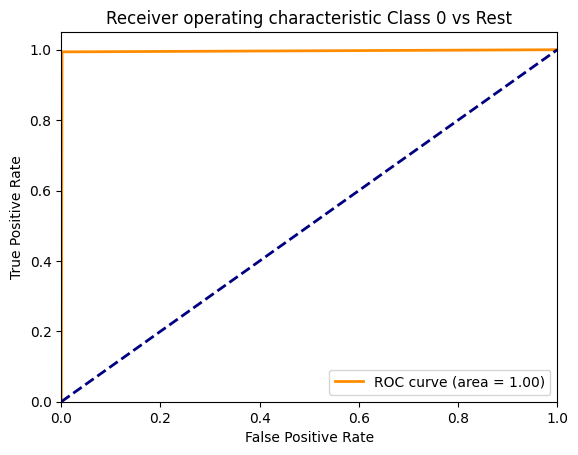

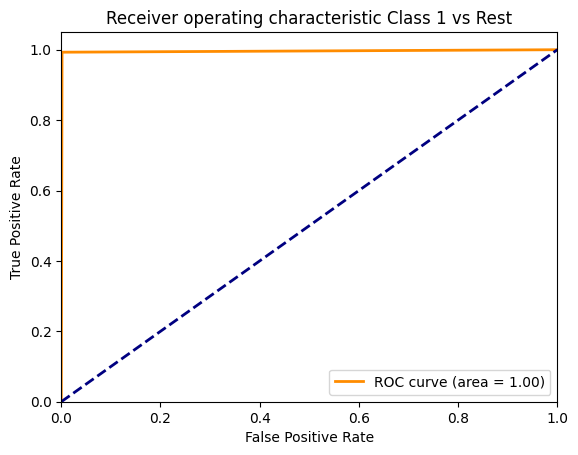

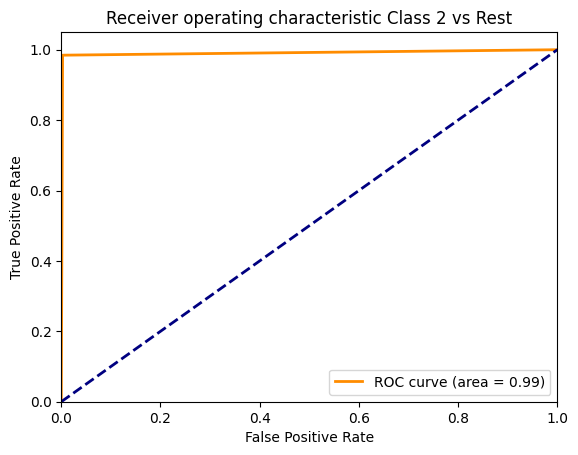

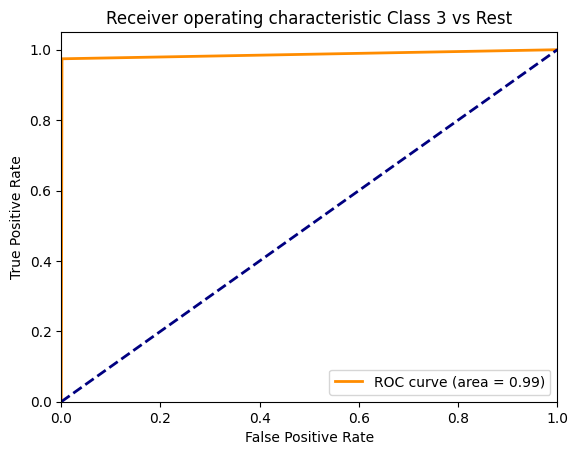

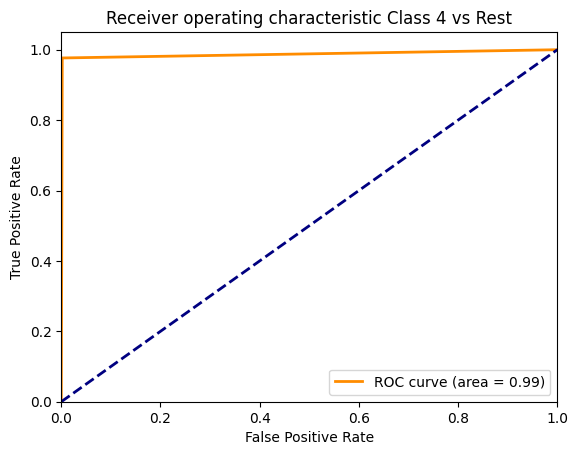

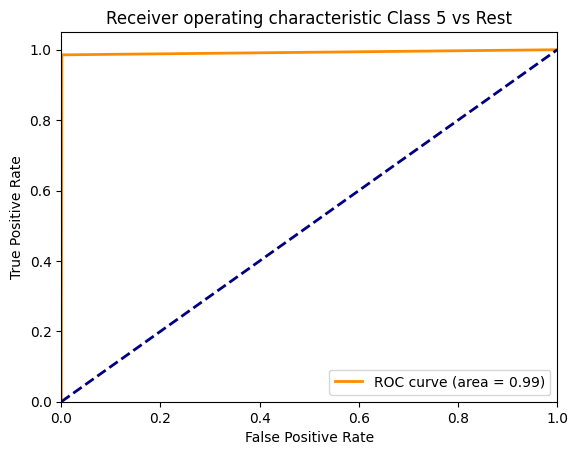

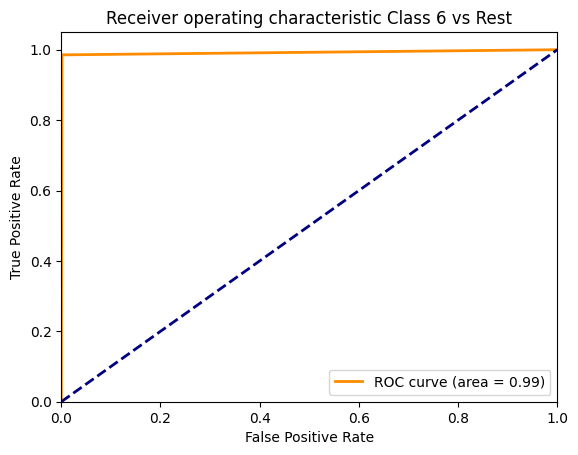

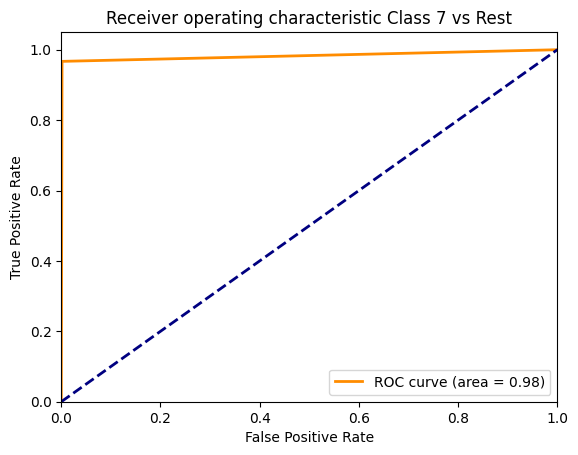

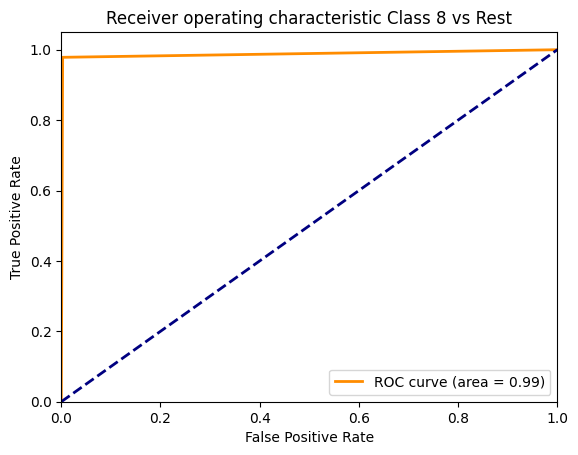

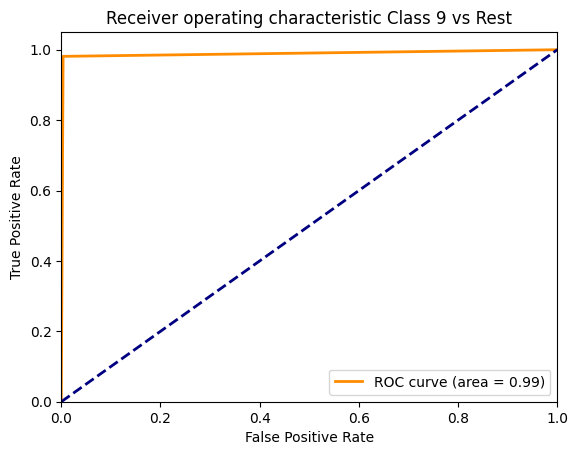

In [43]:
# ROC curve

for class_number in range(10):
  fpr, tpr, _ = roc_curve(labels_test[:, class_number], labels_prediction_max[:, class_number])
  roc_auc = auc(fpr, tpr)

  plt.figure()
  lw = 2
  plt.plot(
      fpr,
      tpr,
      color="darkorange",
      lw=lw,
      label="ROC curve (area = %0.2f)" % roc_auc,
  )

  plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver operating characteristic Class " + str(class_number) + " vs Rest")
  plt.legend(loc="lower right")
  plt.show()

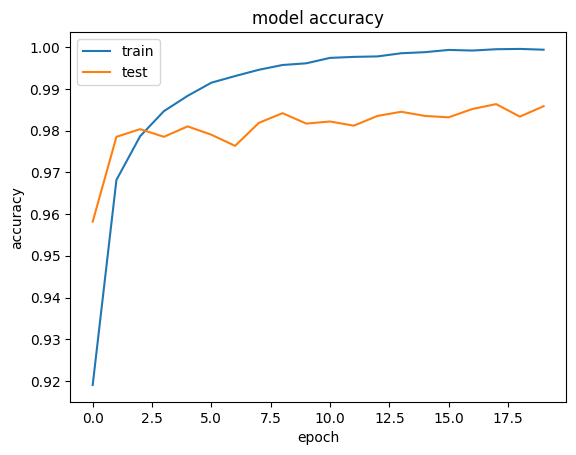

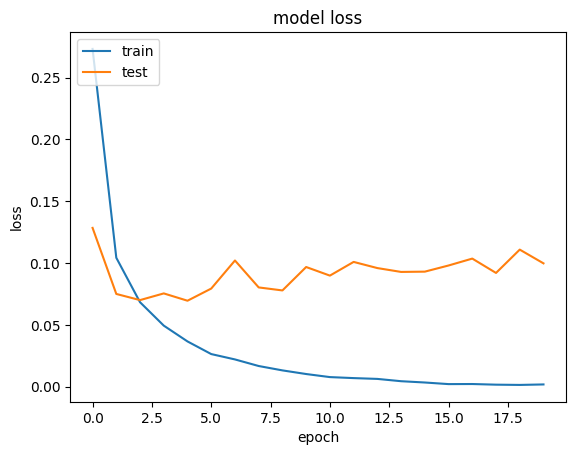

In [44]:
# Learning Curve

# Summarize History for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize History for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Errors for Prediction

In [45]:
errors = (labels_prediction_classes != labels_true)
data_points_test_errors = data_points_test[errors]
labels_prediction_errors = labels_prediction[errors]
labels_prediction_classes_errors = np.array(labels_prediction_classes[errors], dtype=int)
labels_true_errors = np.array(labels_true[errors], dtype=int)

In [46]:
error_based_on_number = np.full((5, 5), -1)
error_based_on_number_count = np.full((5, 5), 0)
true_counter = 0
pred_counter = 0

for error_index in range(len(labels_true_errors)):
  if labels_true_errors[error_index] >= 5 and labels_prediction_classes_errors[error_index] < 5:
    error_based_on_number_count[labels_true_errors[error_index]-5][labels_prediction_classes_errors[error_index]]+=1
    if (error_based_on_number[labels_true_errors[error_index]-5][labels_prediction_classes_errors[error_index]] == -1).all():
      error_based_on_number[labels_true_errors[error_index]-5][labels_prediction_classes_errors[error_index]] = error_index

most_likely_based_on_number = [error_based_on_number_count[index].tolist().index(np.max(error_based_on_number_count[index])) for index in range(5)]

In [47]:
# Prediction for Values
print("Prediction:")
print("5 -> ", most_likely_based_on_number[0])
print("6 -> ", most_likely_based_on_number[1])
print("7 -> ", most_likely_based_on_number[2])
print("8 -> ", most_likely_based_on_number[3])
print("9 -> ", most_likely_based_on_number[4])

Prediction:
5 ->  3
6 ->  1
7 ->  2
8 ->  2
9 ->  4


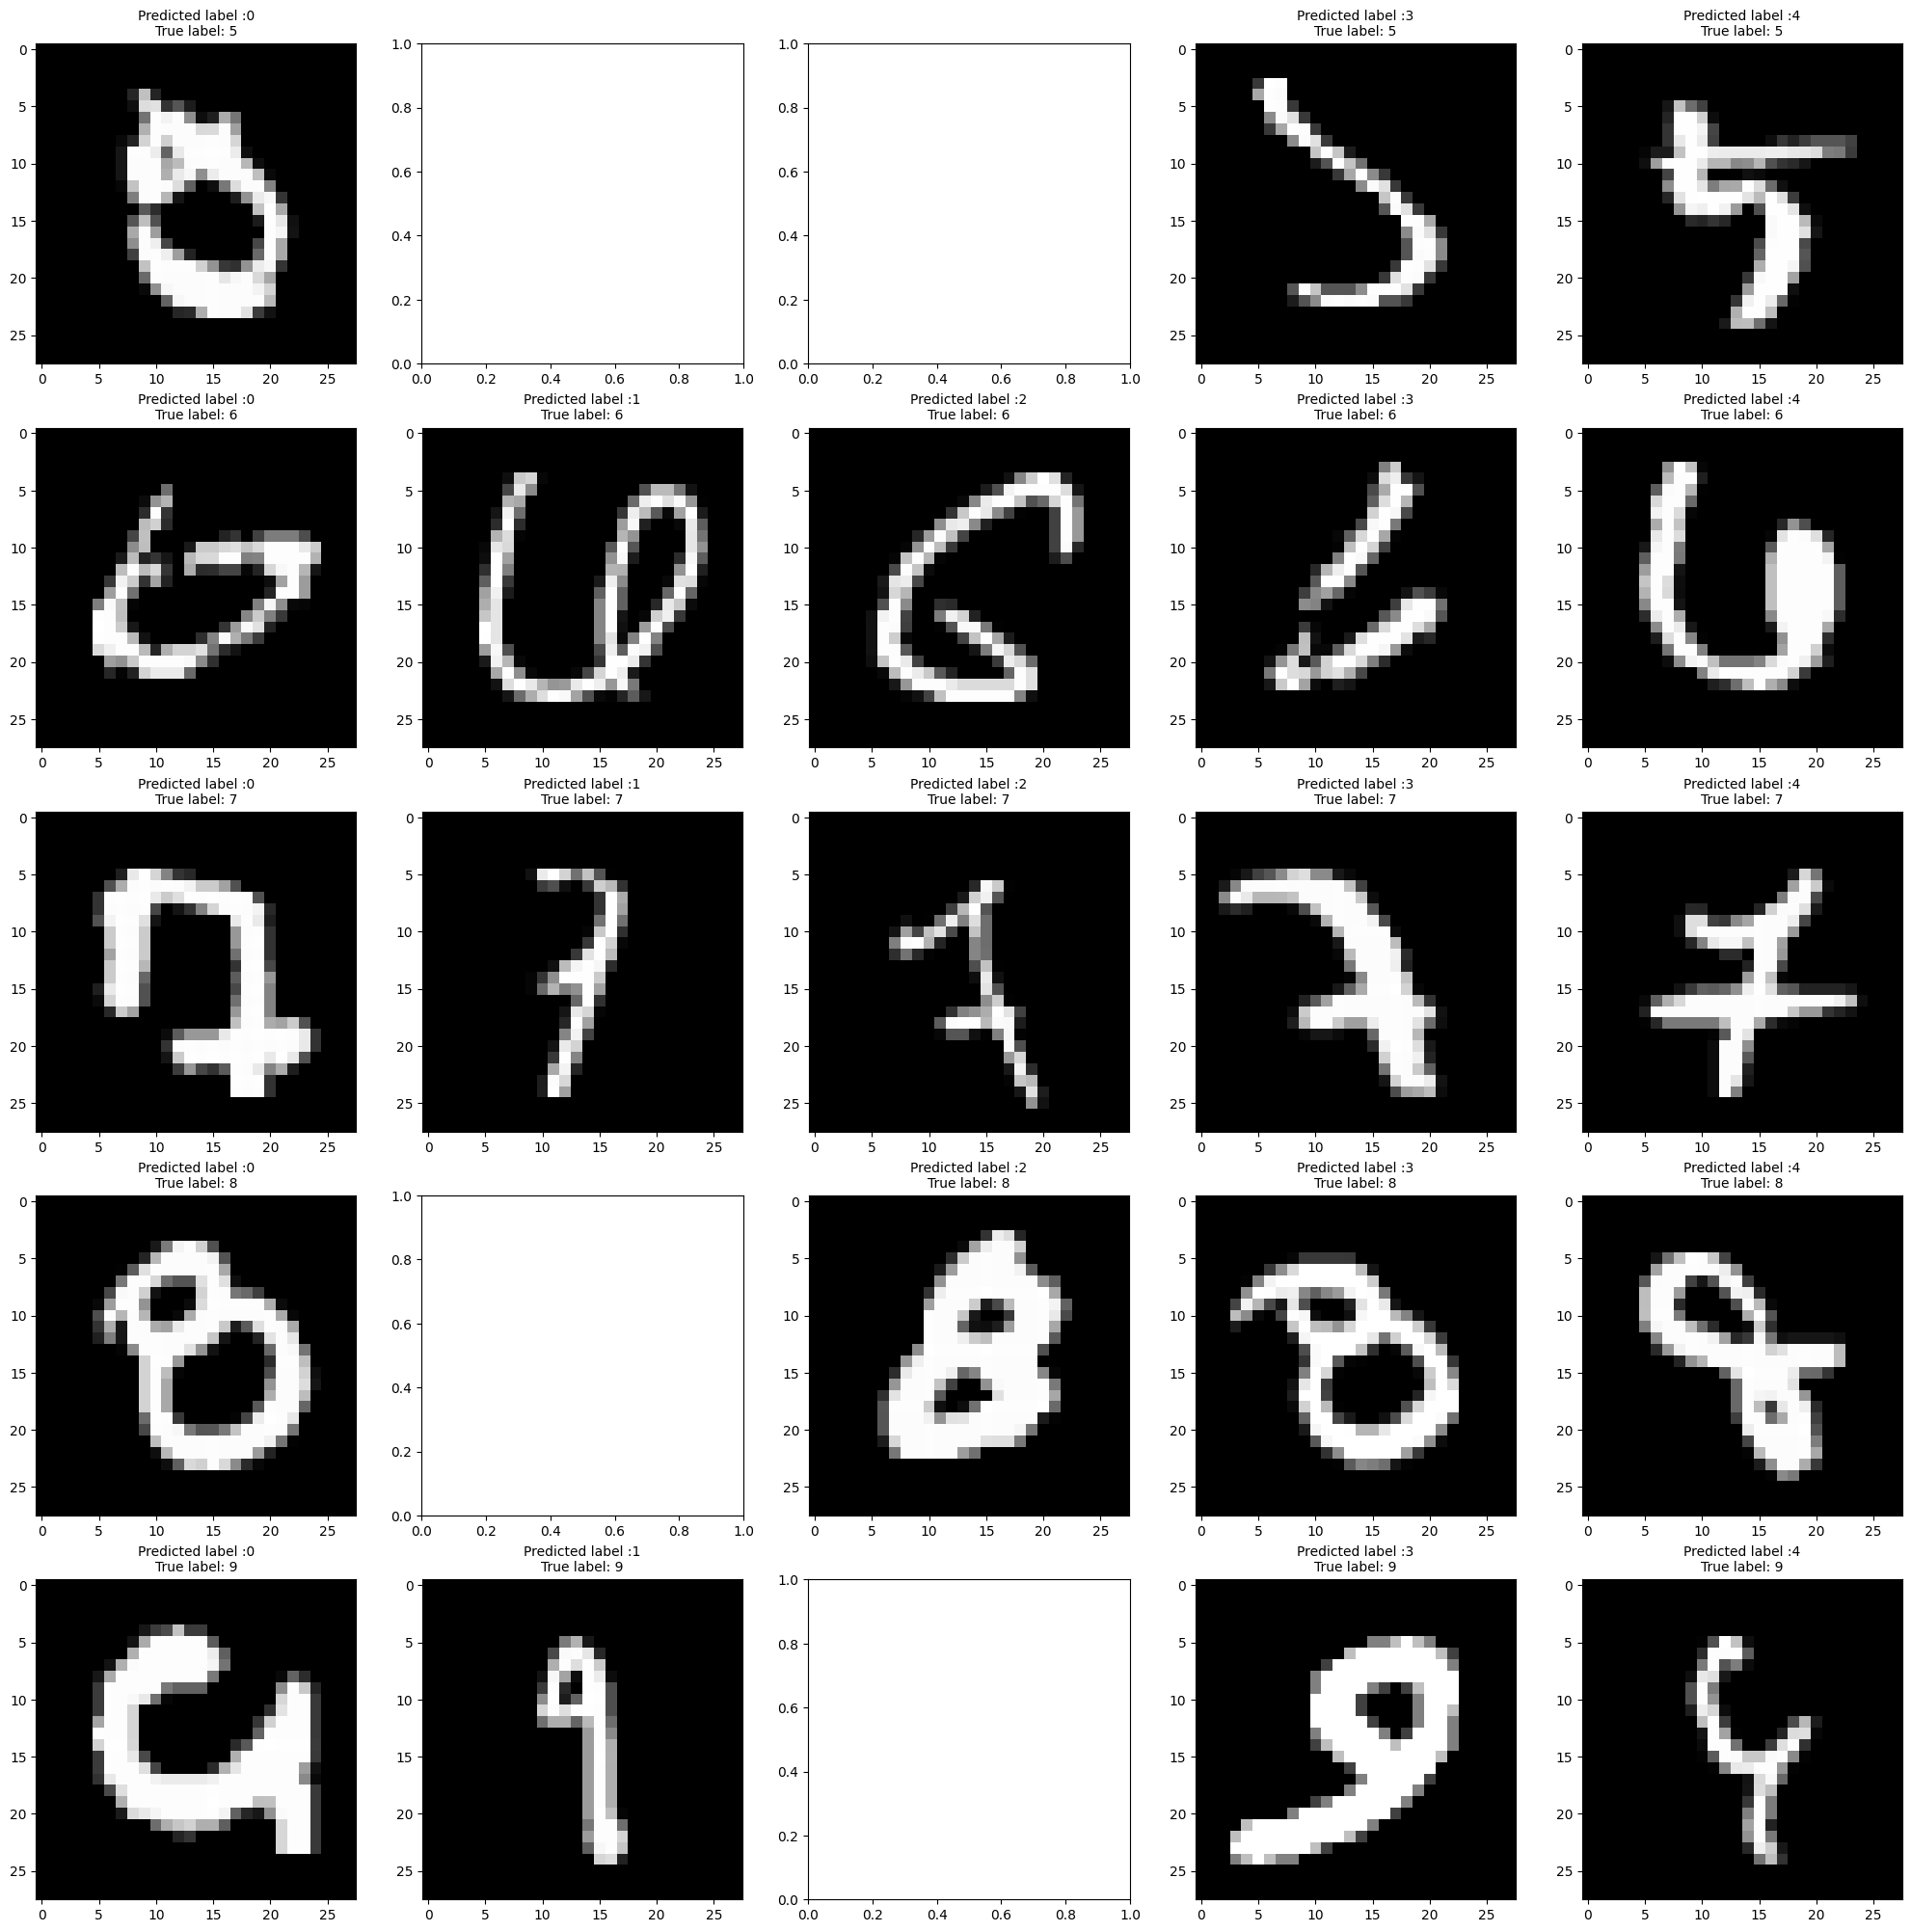

In [48]:
# Show Top Errors
f, ax = plt.subplots(5, 5, figsize=(25,25))

for i in range(5):
  for j in range(5):
    idx = error_based_on_number[i][j]
    if idx != -1:
      sample = data_points_test_errors[idx].reshape(28,28)
      y_t = labels_true_errors[idx]
      y_p = labels_prediction_classes_errors[idx]
      ax[i][j].imshow(sample, cmap='gray')
      ax[i][j].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=10)

# Train with Half of Dataset

## Prepare Data

In [49]:
labels_train_numeric = np.argmax(labels_train, axis=1)
labels_test_numeric = np.argmax(labels_test, axis=1)

In [50]:
indices_0_to_4_train = [index for index in range(len(data_points_train)) if labels_train_numeric[index] < 5]
indices_0_to_4_test = [index for index in range(len(data_points_test)) if labels_test_numeric[index] < 5]

data_points_0_to_4 = np.append(data_points_train[indices_0_to_4_train], data_points_test[indices_0_to_4_test], axis=0)
labels_0_to_4 = np.append(labels_train[indices_0_to_4_train], labels_test[indices_0_to_4_test], axis=0)

indices_5_to_9_train = [index for index in range(len(data_points_train)) if labels_train_numeric[index] >= 5]
indices_5_to_9_test = [index for index in range(len(data_points_test)) if labels_test_numeric[index] >= 5]

data_points_5_to_9 = np.append(data_points_train[indices_5_to_9_train], data_points_test[indices_5_to_9_test], axis=0)
labels_5_to_9 = np.append(labels_train[indices_5_to_9_train], labels_test[indices_5_to_9_test], axis=0)

## Implement Model

In [51]:
# Implement Model with Half of Dataset
model_of_half, _ = create_model(x_input=data_points_0_to_4, y_input=labels_0_to_4)

Epoch 1/20
252/252 [==============================] - 4s 12ms/step - loss: 0.1359 - accuracy: 0.9602 - recall: 0.9463 - precision: 0.9651 - val_loss: 0.0569 - val_accuracy: 0.9801 - val_recall: 0.9789 - val_precision: 0.9823
Epoch 2/20
252/252 [==============================] - 2s 10ms/step - loss: 0.0410 - accuracy: 0.9871 - recall: 0.9861 - precision: 0.9880 - val_loss: 0.0272 - val_accuracy: 0.9922 - val_recall: 0.9916 - val_precision: 0.9925
Epoch 3/20
252/252 [==============================] - 2s 10ms/step - loss: 0.0234 - accuracy: 0.9925 - recall: 0.9919 - precision: 0.9932 - val_loss: 0.0245 - val_accuracy: 0.9913 - val_recall: 0.9914 - val_precision: 0.9919
Epoch 4/20
252/252 [==============================] - 2s 10ms/step - loss: 0.0161 - accuracy: 0.9948 - recall: 0.9945 - precision: 0.9951 - val_loss: 0.0198 - val_accuracy: 0.9938 - val_recall: 0.9936 - val_precision: 0.9941
Epoch 5/20
252/252 [==============================] - 5s 19ms/step - loss: 0.0108 - accuracy: 0.9965

## Check Results

In [52]:
y_pred = model_of_half.predict(data_points_5_to_9)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(labels_5_to_9, axis=1)

1071/1071 [==============================] - 3s 3ms/step


In [53]:
# Accuracy

accuracy_value = accuracy_score(y_true, y_pred_classes)

print(accuracy_value)

0.0


In [54]:
errors = (y_pred_classes != y_true)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = np.array([y_pred[errors][index].tolist().index(np.max(y_pred[errors][index])) for index in range(len(y_pred[errors]))], dtype=int)
y_true_errors = np.array(y_true[errors], dtype=int)
x_test_errors = data_points_5_to_9[errors]

In [55]:
error_based_on_number = np.full((5, 5), -1)
error_based_on_number_count = np.full((5, 5), 0)
true_counter = 0
pred_counter = 0

for error_index in range(len(y_true_errors)):
  if y_true_errors[error_index] >= 5 and y_pred_errors[error_index] < 5:
    error_based_on_number_count[y_true_errors[error_index]-5][y_pred_errors[error_index]]+=1
    if (error_based_on_number[y_true_errors[error_index]-5][y_pred_errors[error_index]] == -1).all():
      error_based_on_number[y_true_errors[error_index]-5][y_pred_errors[error_index]] = error_index

most_likely_based_on_number = [error_based_on_number_count[index].tolist().index(np.max(error_based_on_number_count[index])) for index in range(5)]

In [56]:
# Real Values
print("Real:")
print("5 -> ", most_likely_based_on_number[0])
print("6 -> ", most_likely_based_on_number[1])
print("7 -> ", most_likely_based_on_number[2])
print("8 -> ", most_likely_based_on_number[3])
print("9 -> ", most_likely_based_on_number[4])

Real:
5 ->  3
6 ->  4
7 ->  3
8 ->  3
9 ->  4


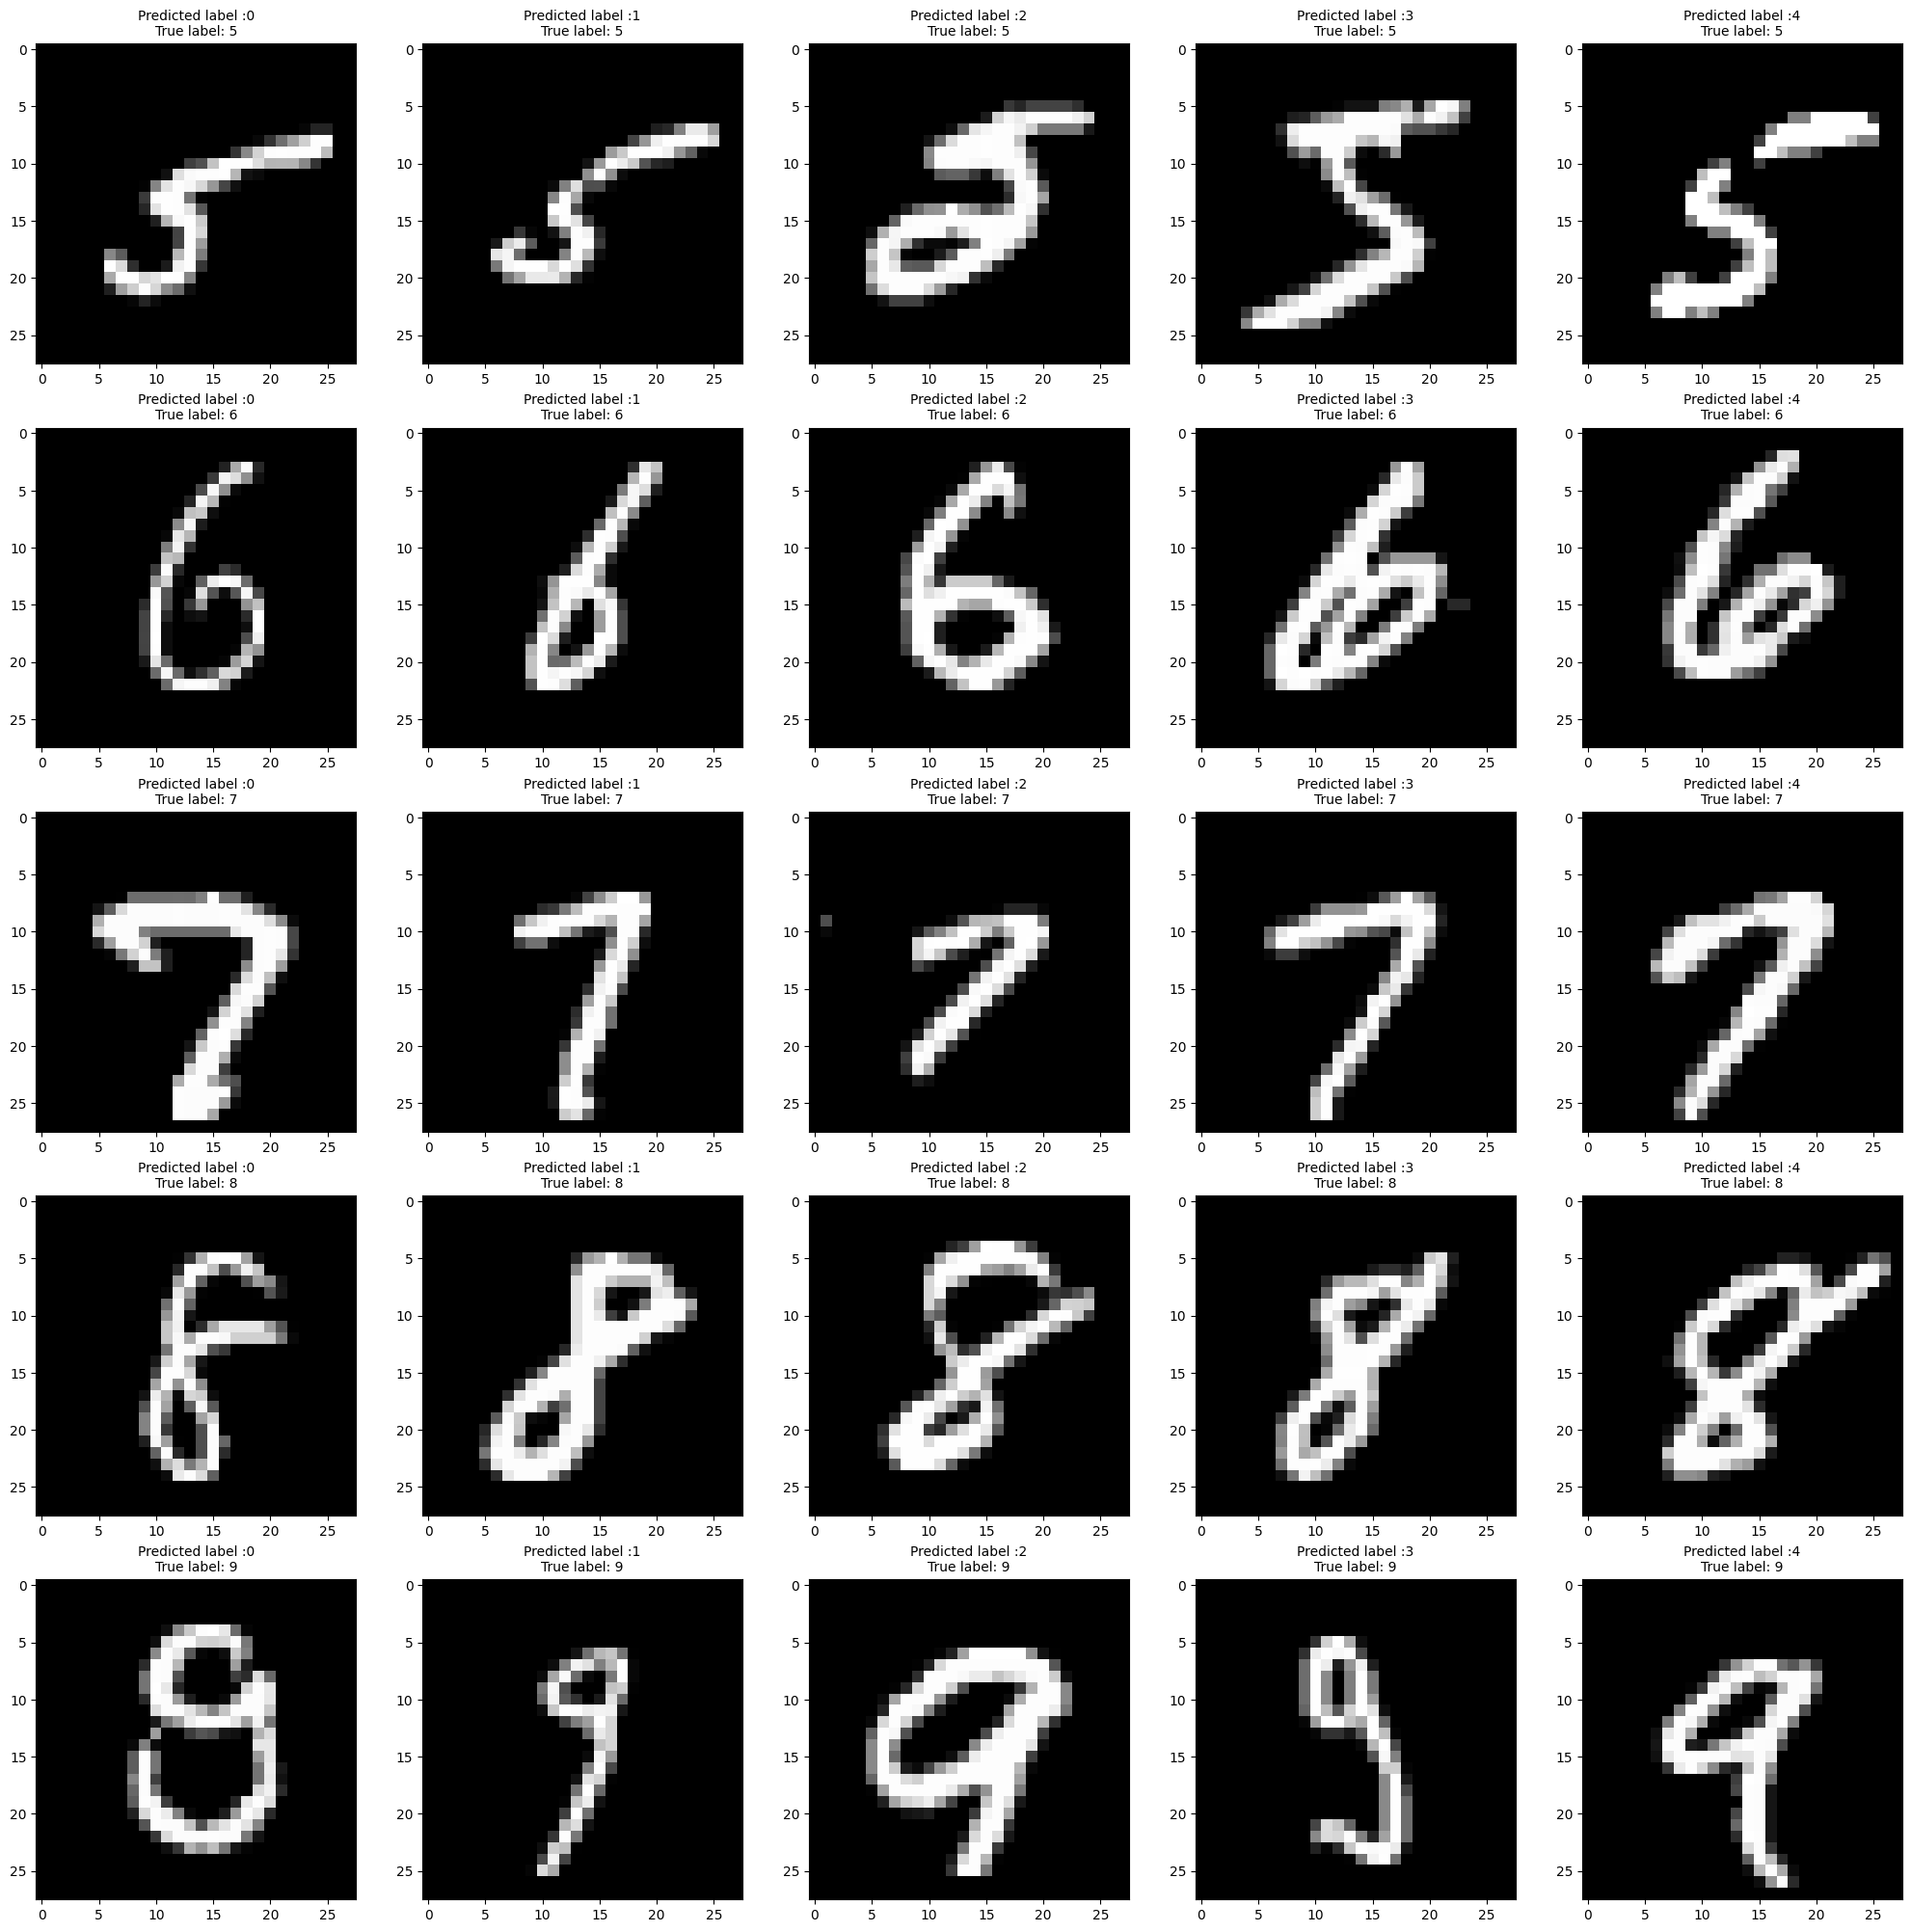

In [57]:
# Show Errors
f, ax = plt.subplots(5, 5, figsize=(25,25))

for i in range(5):
  for j in range(5):
    idx = error_based_on_number[i][j]
    if idx != -1:
      sample = x_test_errors[idx].reshape(28,28)
      y_t = y_true_errors[idx]
      y_p = y_pred_classes_errors[idx]
      ax[i][j].imshow(sample, cmap='gray')
      ax[i][j].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=10)